In [1]:
import pandas as pd
import numpy as np
from DateTime import DateTime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/apple.csv',sep=',',encoding='utf-8')

- The different values that we can see on the dataframe are basic features in stock market Analysis, for now, the work is only going to be with the Closing value.

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/29/2024,$190.29,53068020,$189.61,$192.247,$189.51
1,05/28/2024,$189.99,52280050,$191.51,$193.00,$189.10
2,05/24/2024,$189.98,36326980,$188.82,$190.58,$188.0404
3,05/23/2024,$186.88,51005920,$190.98,$191.00,$186.625
4,05/22/2024,$190.90,34648550,$192.265,$192.8231,$190.27


- Transformation of the data to begin the EDA

In [4]:
df= pd.read_csv('../Data/apple.csv',sep=',',encoding='utf-8')
df= df[['Date','Close/Last']]
df['Close/Last']=df['Close/Last'].str.replace('$','',regex=False).astype(float)
df['Date']= pd.to_datetime(df['Date'])
df.sort_values(by='Date',inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.set_index('Date',inplace=True)


- in this Analysis, we can see the change in the value of the price in the last 10 years, the is a considerable change in the scale from 2021 and 2022, lets begin an analysis from 2014, later on iterate over that same proces from 2021,2022 an finally in 2023
We can see that there is a very considerable trend and pattern from 2023, later on we are going to analyze more of those points

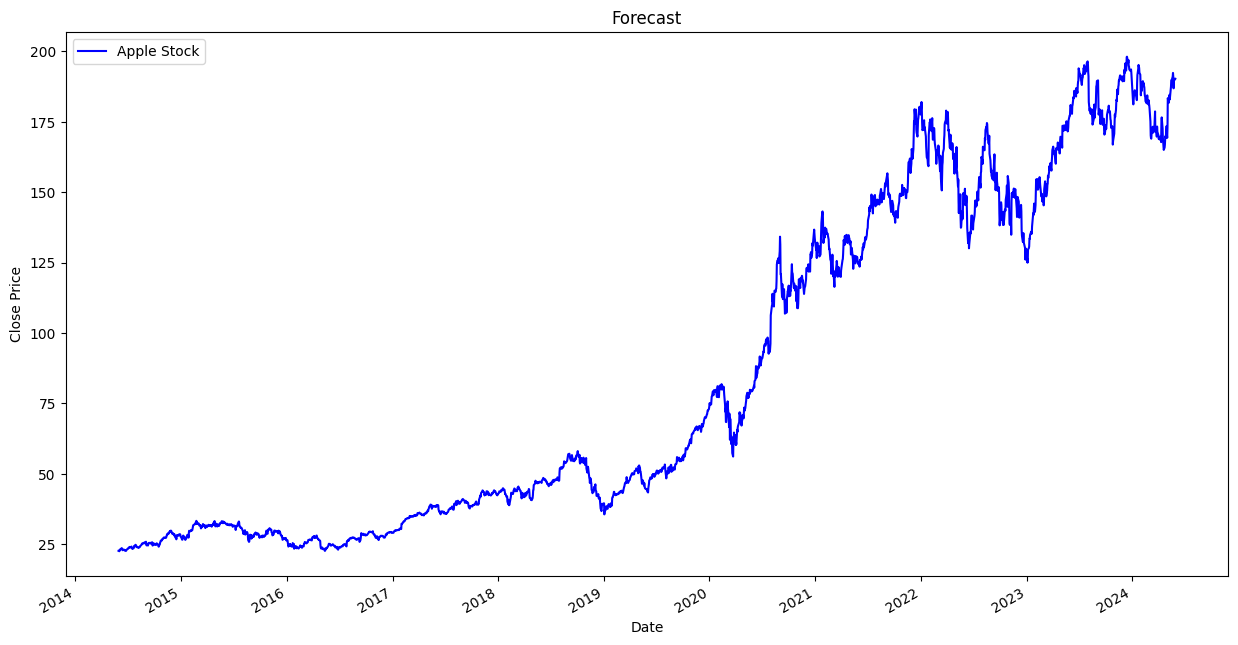

In [5]:
# plt.plot(df.index, df['Close/Last'])
df["Close/Last"].plot(figsize=(15, 8), label="Apple Stock", color= "blue")

plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

plt.show()


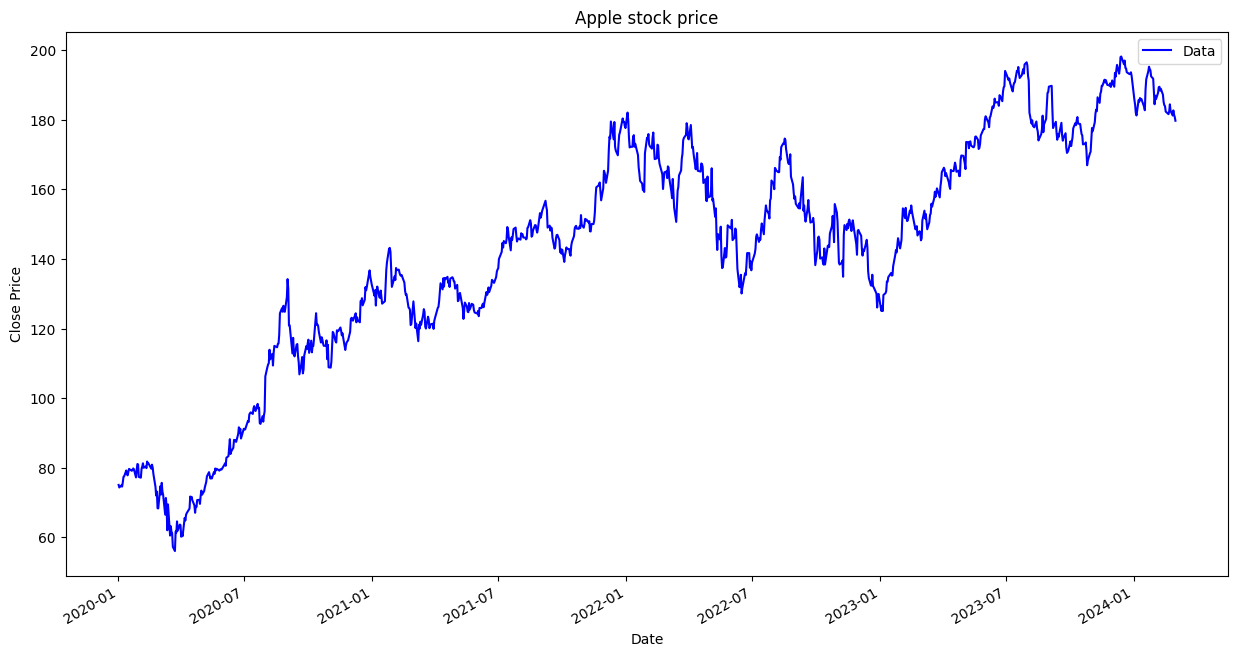

In [6]:
start_date = '2020-01-01'
end_date = '2024-03-01'

df1_filtered = df[(df.index >= start_date) & (df.index <= end_date)]
df1_filtered["Close/Last"].plot(figsize=(15, 8), label="Data", color='blue')

plt.title("Apple stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

plt.show()

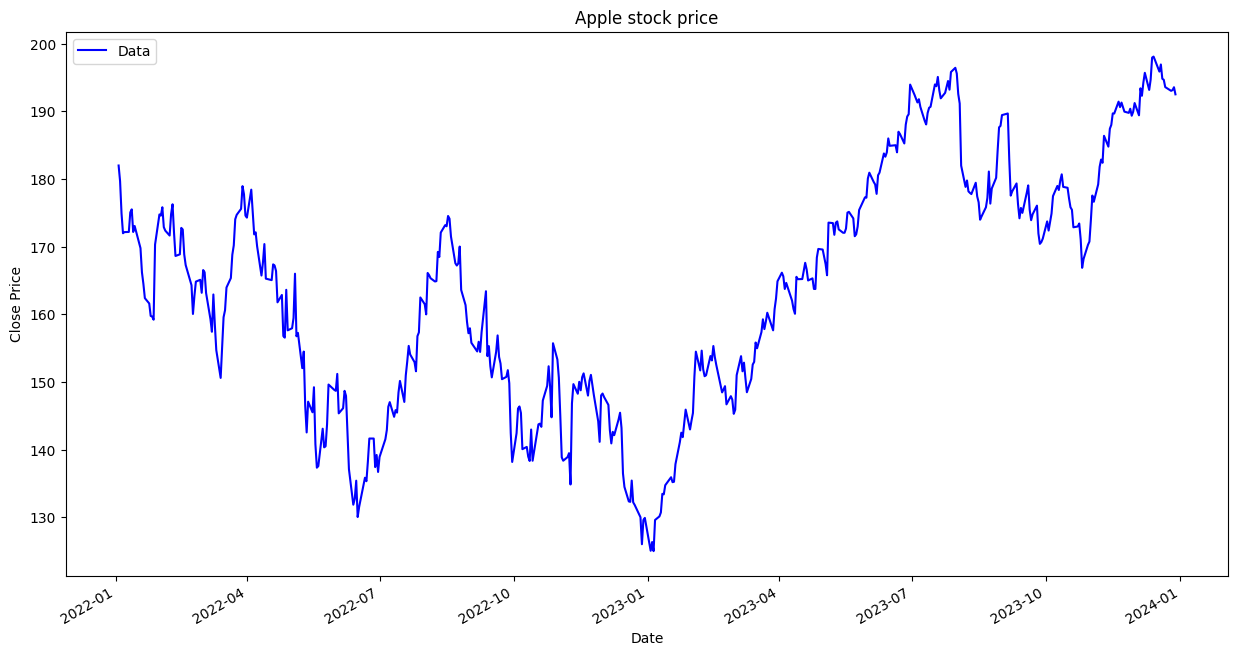

In [7]:
start_date = '2022-01-01'
end_date = '2024-01-01'

df1_filtered = df[(df.index >= start_date) & (df.index <= end_date)]
df1_filtered["Close/Last"].plot(figsize=(15, 8), label="Data", color='blue')

plt.title("Apple stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

plt.show()

In [8]:
%pip install plotly -q

Note: you may need to restart the kernel to use updated packages.


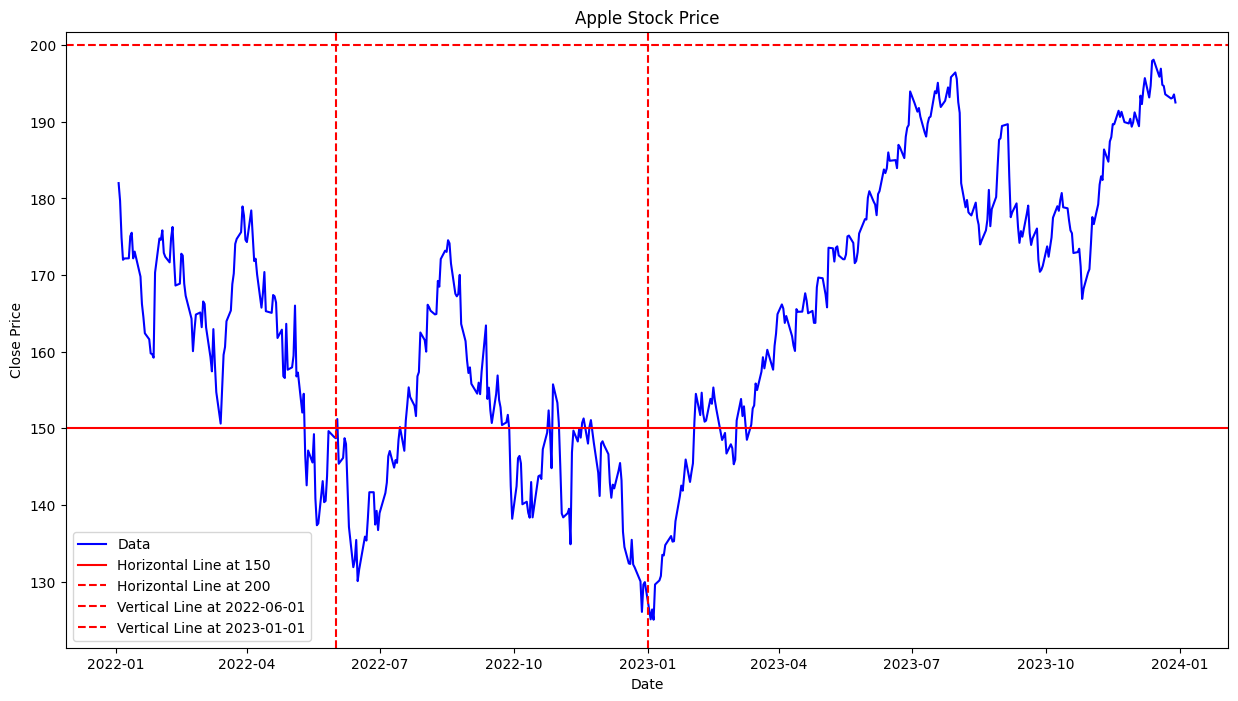

In [9]:
start_date = '2022-01-01'
end_date = '2024-01-01'

df1_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

plt.figure(figsize=(15, 8))

plt.plot(df1_filtered.index, df1_filtered["Close/Last"], label="Data", color='blue')


plt.axhline(y=150, color='red', linestyle='-', label='Horizontal Line at 150')
plt.axhline(y=200, color='red', linestyle='--', label='Horizontal Line at 200')

plt.axvline(x=pd.to_datetime('2022-06-01'), color='red', linestyle='--', label='Vertical Line at 2022-06-01')
plt.axvline(x=pd.to_datetime('2023-01-01'), color='red', linestyle='--', label='Vertical Line at 2023-01-01')

plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

plt.show()

In [10]:
%pip install nbformat>=4.2.0

zsh:1: 4.2.0 not found
Note: you may need to restart the kernel to use updated packages.


In [11]:
import plotly.graph_objects as go

# Assuming df is already defined and contains your data
# Define your start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Filter the dataframe based on the dates
df1_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

# Create a plot
fig = go.Figure()

# Add the main data line
fig.add_trace(go.Scatter(
    x=df1_filtered.index, 
    y=df1_filtered["Close/Last"], 
    mode='lines',
    name='Data',
    line=dict(color='blue')
))

# Add horizontal lines
fig.add_shape(type='line',
              x0=start_date, x1=end_date, y0=150, y1=150,
              line=dict(color='red', dash='solid'),
              name='Horizontal Line at 150')

fig.add_shape(type='line',
              x0=start_date, x1=end_date, y0=200, y1=200,
              line=dict(color='red', dash='dash'),
              name='Horizontal Line at 200')

# Add vertical lines
fig.add_shape(type='line',
              x0='2022-06-01', x1='2022-06-01', y0=df1_filtered["Close/Last"].min(), y1=df1_filtered["Close/Last"].max(),
              line=dict(color='red', dash='dash'),
              name='Vertical Line at 2022-06-01')

fig.add_shape(type='line',
              x0='2023-01-01', x1='2023-01-01', y0=df1_filtered["Close/Last"].min(), y1=df1_filtered["Close/Last"].max(),
              line=dict(color='red', dash='dash'),
              name='Vertical Line at 2023-01-01')

# Update layout with titles and labels
fig.update_layout(
    title="Apple Stock Price",
    xaxis_title="Date",
    yaxis_title="Close Price"
)

# Show the plot
fig.show()
